In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
# import scipy 


In [2]:
# print(scipy.__version__)

In [3]:
print(tf.config.list_physical_devices())
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.15.0


In [4]:
# pathh = 'MNISTClassifier'

# for parent, dirs, files in os.walk(pathh, topdown=False):
#   for file in files:
#     file_path = os.path.join(parent, file)
#     os.remove(file_path)
#   for dir in dirs:
#     dir_path = os.path.join(parent, dir)
#     os.rmdir(dir_path)

# os.rmdir('./MNISTClassifier')

In [5]:
# (images, labels), (test_images, test_labels) = mnist.load_data()
# images = images.reshape((60000, 28, 28)).astype("float32") / 255
# images = np.expand_dims(images, axis=3)
# test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
# test_images = np.expand_dims(test_images, axis=3)
# x_train, x_test = images[10000:], images[:10000]
# y_train, y_test = labels[10000:], labels[:10000]

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
# x_train, x_test = images, test_images
# y_train, y_test = labels, test_labels

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images = np.asarray([cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in train_images])
test_images = np.asarray([cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in test_images])

In [9]:
train_images = [cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in train_images]
train_images = np.asarray(train_images)


In [10]:
test_images = [cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in test_images]
test_images = np.asarray(test_images)


In [11]:
print(train_images.shape, test_images.shape)

(60000, 64, 64, 3) (10000, 64, 64, 3)


In [12]:
# train_images = np.asarray([np.expand_dims(x, axis=2) for x in train_images])
# test_images = np.asarray([np.expand_dims(x, axis=2) for x in test_images])

In [13]:
print('x_train.shape', train_images.shape)
print('y_train.shape', train_images.shape)


x_train.shape (60000, 64, 64, 3)
y_train.shape (60000, 64, 64, 3)


In [14]:
full_dataset = np.concatenate((train_images, test_images), axis=0)
full_dataset.shape

(70000, 64, 64, 3)

In [15]:
full_dataset.shape

(70000, 64, 64, 3)

In [16]:
full_dataset_label = np.concatenate((train_labels, test_labels), axis=0)
full_dataset_label.shape

(70000,)

In [17]:
# x_test, y_test = test_images, test_labels

In [18]:
# x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=104, test_size=0.166655, shuffle=True)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(full_dataset,full_dataset_label, random_state=104, test_size=0.1, shuffle=True )

In [20]:
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
# print('x_val.shape', x_val.shape)
# print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_train.shape (63000, 64, 64, 3)
y_train.shape (63000,)
x_test.shape (7000, 64, 64, 3)
y_test.shape (7000,)


(64, 64, 3)


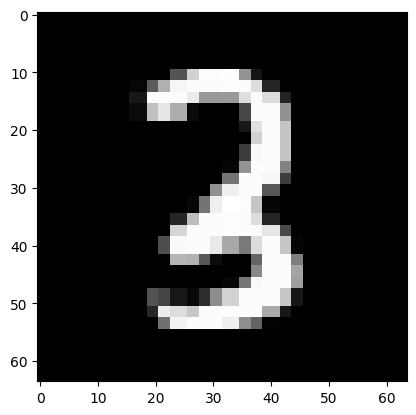

In [21]:
x_test_43 = x_test[35]

print(x_test_43.shape)
digit = x_test_43
fig = plt.figure
plt.imshow(digit)
# print(x_test_43)

#twos are located at [(1, 2), (35, 2), (38, 2), (43, 2), (47, 2), (72, 2), (77, 2), (82, 2), (106, 2), (119, 2)]

In [22]:
# x_test_43 = x_test[35]
# x_test_43

In [23]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)
#select labels that are digit 2

[(11, 2), (20, 2), (24, 2), (37, 2), (46, 2), (56, 2), (60, 2), (65, 2), (68, 2), (78, 2)]


# Networks

## Custom

In [24]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='sigmoid')#might reduce over fitting
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1,self.max_pool1, self.conv2,self.max_pool2, self.dropout1,
                           self.flatten, self.dense1, self.dropout2, self.dense2]
    
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob

## Backbone Networks

In [25]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [26]:
class VGG16model(tf.keras.Model):
    def __init__(self, base_model):
        super(VGG16model, self).__init__()
        #instantiate base model
        self.base_model = base_model
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.base_model, self.flatten, self.dense1, self.dense2]

    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob
    

In [27]:
input_layer = tf.keras.layers.Input(shape=(64, 64, 3))
base_model = VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
base_model.trainable = False



2024-03-22 15:30:05.794047: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-22 15:30:05.794088: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-22 15:30:05.794096: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-22 15:30:05.794159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-22 15:30:05.794186: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

## Model fit and saving

In [29]:
class SavefinalTrainingLogitsProp(keras.callbacks.Callback):
    def on_train_end(self, logs):
        self.out = model.predict(x_train)
        self.prob = tf.nn.softmax(self.out)
        print(self.out.shape, self.prob.shape)

In [30]:
def plot_loss_acc(train_metric_values, val_metric_values, type=None, plt_title=None):
    epochs = range(1, len(train_metric_values) +1)
    plt.plot(epochs, train_metric_values, 'bo', label=f'Training {type}')
    plt.plot(epochs, val_metric_values, 'b', label=f'validation {type}')
    plt.title(plt_title)
    plt.xlabel('Epochs')
    plt.ylabel(f'{type}')
    plt.legend()
    plt.show()
    
    

In [31]:
model_custom = MNISTClassifier()
model_custom.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              metrics=['accuracy'])

custom_history = model_custom.fit(x_train, y_train, epochs=10, validation_split=0.2)
# model_custom.save('MNISTClassifier')

Epoch 1/10
   1/1575 [..............................] - ETA: 12:38 - loss: 2.5884 - accuracy: 0.1562

2024-03-22 15:30:11.104904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1575/1575 [==============================] - 17s 10ms/step - loss: 0.2104 - accuracy: 0.9418 - val_loss: 0.0781 - val_accuracy: 0.9781
Epoch 2/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0819 - accuracy: 0.9758 - val_loss: 0.0569 - val_accuracy: 0.9830
Epoch 3/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0487 - val_accuracy: 0.9861
Epoch 4/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0456 - accuracy: 0.9864 - val_loss: 0.0459 - val_accuracy: 0.9863
Epoch 5/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 6/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0310 - accuracy: 0.9903 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 7/10
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0420 - val_accura

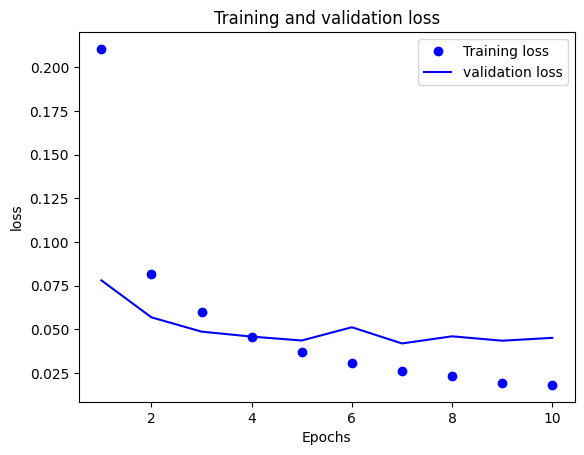

In [32]:
loss_values = custom_history.history["loss"]
val_loss_values = custom_history.history["val_loss"]
plot_loss_acc(loss_values, val_loss_values, type='loss',  plt_title="Training and validation loss")

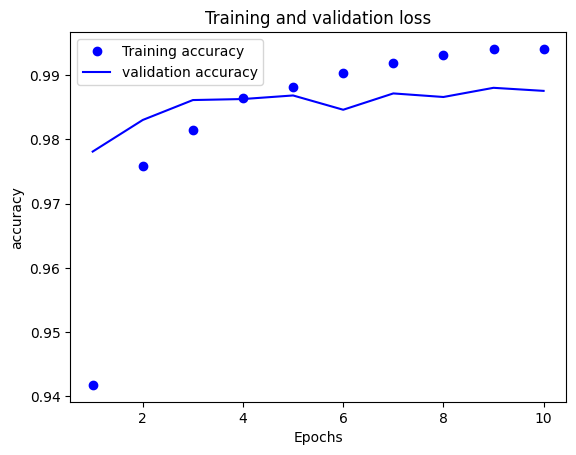

In [33]:
accuracy_values = custom_history.history["accuracy"]
val_accuracy_values = custom_history.history["val_accuracy"]
plot_loss_acc(accuracy_values, val_accuracy_values, type='accuracy',  plt_title="Training and validation loss")

In [34]:
# model_vgg16 = VGG16model(base_model)
# model_vgg16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])

# vgg16_history = model_vgg16.fit(x_train, y_train, epochs=10, validation_split=0.2) 
# # custom_history = model_custom.fit(x_train, y_train, epochs=10, validation_split=0.2)
# # model_vgg16.save('VGG16Classifier')

# Load model and make predictions

## prepare images and labels

In [35]:
twos_tupple = [(11, 2), (20, 2), (24, 2), (37, 2), (46, 2), (56, 2), (60, 2), (65, 2), (68, 2), (78, 2)]
reshaped_sample_twos = []
class_arr = []

for tup in twos_tupple:
    a_two = x_test[tup[0]]
    print('a_two.shape', a_two.shape)
    a_two = np.reshape(a_two, (-1, 64, 64, 3))
    print('a_two.shape', a_two.shape)
    a_two_label = y_test[tup[0]]
    a_two_label = tf.convert_to_tensor(a_two_label)
    class_arr.append(a_two_label)
    # print(a_two_label)
    reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)

a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)


In [36]:
print(y_test[37])

2


In [37]:
one_reshaped = reshaped_sample_twos[0]
np.sum(model_custom(one_reshaped)[0])

-36.94802

In [38]:
# model_mnist = tf.keras.models.load_model('MNISTClassifier')

predictions = []
for sample in reshaped_sample_twos:
    sample_prediction = model_custom(sample)
    print('sample_prediction', sample_prediction)
    predictions.append(sample_prediction)
#check a prediction
print(np.argmax(predictions[1][0]))

sample_prediction (<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -5.8780317 ,  -0.2900474 ,   9.21613   ,  -0.10481007,
         -9.403269  , -11.242293  ,  -8.607591  ,  -1.3223882 ,
         -1.8842028 ,  -7.431519  ]], dtype=float32)>, <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.7835517e-07, 7.4375515e-05, 9.9979419e-01, 8.9511268e-05,
        8.1961122e-09, 1.3029570e-09, 1.8162137e-08, 2.6490488e-05,
        1.5104178e-05, 5.8874623e-08]], dtype=float32)>)
sample_prediction (<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-7.5080786, -4.4966297,  7.1841373,  0.8730877, -6.7732224,
        -6.8272204, -7.9395885, -0.5045798, -0.575175 , -2.9614236]],
      dtype=float32)>, <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[4.1500999e-07, 8.4316807e-06, 9.9725658e-01, 1.8111436e-03,
        8.6537176e-07, 8.1988190e-07, 2.6956045e-07, 4.5670898e-04,
        4.2557923e-04, 3.9142233e-05]], dtype=float32)>)
sample_prediction (<tf.Tensor: shape

In [39]:
print(reshaped_sample_twos[0].shape)
# drop first dimension (batch) and prepare for attack
squeze_two = np.squeeze(reshaped_sample_twos[2])
print(squeze_two.shape)
# squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
# squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[35]
y = tf.convert_to_tensor(y)
print(y)
print(x.shape)

(1, 64, 64, 3)
(64, 64, 3)
tf.Tensor(3, shape=(), dtype=uint8)
(1, 64, 64, 3)


In [40]:
# xs = np.array([1, 2, 3])
# xs.ndim

In [41]:
# xs = np.array([xs])
# xs.ndim

# Attack and Plot

In [42]:
from tensorflow.keras import layers, losses, optimizers

In [197]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

class CWAttack:
    def __init__(self, model, targeted=False, c=1, kappa=0, steps=50, lr=0.01):
        self.model = model
        self.targeted = targeted
        self.c = c
        self.kappa = kappa
        self.steps = steps
        self.lr = lr

    def preprocess_input(self, x):
        return tf.convert_to_tensor(x, dtype=tf.float32)

    def tanh_space(self, x):
        return 0.5 * (tf.tanh(x) + 1)

    def inverse_tanh_space(self, x):
        return 0.5 * tf.math.log((1 + x) / (1 - x))

    def f(self, outputs, labels):
        one_hot_labels = tf.one_hot(labels, depth=outputs.shape[1])

        other = tf.reduce_max((1 - one_hot_labels) * outputs, axis=1)
        real = tf.reduce_max(one_hot_labels * outputs, axis=1)

        if self.targeted:
            return tf.clip_by_value((other - real), clip_value_min=-self.kappa, clip_value_max=float('inf'))
        else:
            return tf.clip_by_value((real - other), clip_value_min=-self.kappa, clip_value_max=float('inf'))

    def generate_adversarial_example(self, x, target_label=None):
        x = self.preprocess_input(x)
        w = tf.Variable(tf.zeros_like(x), trainable=True)

        for _ in range(self.steps):
            with tf.GradientTape() as tape:
                perturbed_image = self.tanh_space(w) + x
                perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)
                outputs = self.model(perturbed_image)[1]
                # if int(tf.argmax(outputs[0])) != target_label:
                #     break
                # print("tf.argmax(outputs)", int(tf.argmax(outputs[0])), target_label)
                loss = self.loss_function(x, perturbed_image, outputs, target_label)

            gradients = tape.gradient(loss, w)
            w.assign_sub(self.lr * tf.sign(gradients))

        adversarial_example = self.tanh_space(w) + x
        return tf.clip_by_value(adversarial_example, 0, 1) , self.tanh_space(w)
        
    def loss_function(self, original_image, perturbed_image, model_outputs, target_label):
        # one_hot_target_label = tf.one_hot(target_label, depth=model_outputs.shape[-1])
        # print('one_hot_target_label',one_hot_target_label)
        mse_loss = MeanSquaredError()
        l2_loss = mse_loss(tf.keras.layers.Flatten()(original_image), tf.keras.layers.Flatten()(perturbed_image)).numpy()
        f_loss = tf.reduce_sum(self.f(model_outputs, target_label))
        return l2_loss + self.c * f_loss


In [198]:
a_two_img = reshaped_sample_twos[2]
# print(a_two_img.shape)
cw_attack = CWAttack(model_custom)
res = cw_attack.generate_adversarial_example(a_two_img, 2)

# print(res)
# plt.imshow(np.array(res))
# print(res)

# res = model_custom(reshaped_sample_twos[0])

In [199]:
print(a_two_img.shape, res.shape)
# a_two_img
s_res = tf.squeeze(res)
s_a_two_img = tf.squeeze(a_two_img)

adv_pred = np.argmax(model_custom(res)[0])
# plt.imshow(s_res)
# plt.imshow(adv_pred)
print(adv_pred)

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
plt.imshow(s_res[:,:,0]) #select one dimension to display it in color

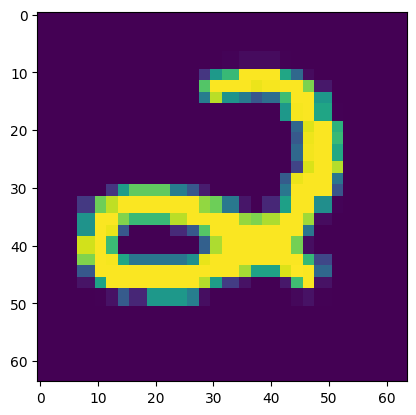

In [200]:
plt.imshow(s_a_two_img[:,:,0])

In [201]:
# print(results[-1])

## Batch attack

In [202]:
def run_attacks(img_arr, class_arr, model, att_func, eps=0.001, type=None):
    # print(att_func)
    results = []
    for img, cls in zip(img_arr, class_arr):
        print(img.shape)
        if type == 'fgsm':
            x_test_adv, perturbation = att_func(model, img, cls, eps)
        elif type == 'deepfool':
            x_test_adv, perturbation = att_func(model, img)
        elif type == 'pgd':
            x_test_adv, perturbation = att_func(model, img)
        elif type == 'cw':
            # att_func = CWAttack(model)
            # res = cw_attack.generate_adversarial_example(a_two_img, 2)
            x_test_adv, perturbation = att_func.generate_adversarial_example(img, cls)
        results.append((x_test_adv, perturbation))
    return results

In [203]:
cw_attack = CWAttack(model_custom)

In [204]:
attack_results = run_attacks(reshaped_sample_twos, class_arr, model_custom, cw_attack, type='cw')

(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)


loop_results = []
for img in reshaped_sample_twos:
    from scipy.optimize import differential_evolution as diff_evo
    pixel = 1
    model = model_custom

    cur_res = one_pixel(img, model, pixel_count=pixel, verbose=False, diff_evo=diff_evo)
    loop_results.append(cur_res)

# Batch distance measure

In [205]:
# adv_image = np.squeeze(attack_results[0][0])
# adv_image = np.expand_dims(adv_image, axis=2)
# org_image = np.expand_dims(np.squeeze(reshaped_sample_twos[0]), axis=2)
# perturbation = np.expand_dims(np.squeeze(attack_results[0][1]), axis=2)
# org_image.shape
# adv_image.shape

In [206]:
loop_results[0][-1].shape

NameError: name 'loop_results' is not defined

In [207]:
def batch_distance_measure(adv_img_arr, org_img_arr):
    l2_norm_distance = []
    for adv_img, org_img in zip(adv_img_arr, org_img_arr):
        cur_adv_img = np.array(adv_img[0])
        # print(cur_adv_img.shape)
        # print(org_img.shape)
        adv_img_flattened = cur_adv_img.flatten()
        org_img_flattened = org_img.flatten()
        distance = np.linalg.norm(org_img_flattened - adv_img_flattened)
        distance = format(distance, '.2f')
        l2_norm_distance.append(distance)
    return l2_norm_distance
        

In [208]:
# l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
# print(l2_norm_distance)

In [209]:
l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
print(l2_norm_distance)

['49.15', '51.85', '51.23', '52.54', '52.72', '50.64', '52.23', '53.26', '50.51', '50.89']


# Visualize predictions and images

In [210]:
# fig = plt.figure(figsize=(10, 10))

# rows = 1
# columns = 3

# fig.add_subplot(rows, columns, 1)
# plt.imshow(org_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Original Image \n predictions: {org_pred}')

# fig.add_subplot(rows, columns, 2)
# plt.imshow(perturbation, cmap='gray')
# plt.axis('off')
# plt.title(f'Pertubation\n /Distance: {distance}')

# fig.add_subplot(rows, columns, 3)
# plt.imshow(adv_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

In [211]:
predi = model_custom.predict(reshaped_sample_twos[0])
reshaped_sample_twos[0].shape
attack_results[0][0].shape
predioo = model_custom.predict(attack_results[0][0])
print(np.argmax(predi), np.argmax(predioo))

1/1 [==============================] - 0s 10ms/step
2 8


In [212]:
def batch_visualization(adv_img_pert_arr, org_img_arr, dist_arr, model=None):
    total_plots = len(dist_arr)
    rows = total_plots
    columns = 3
    for idx in range(total_plots):
        fig = plt.figure(figsize=(10, 10))
        org_pred = model.predict(reshaped_sample_twos[0])
        list_org_pred = list(org_pred)
        list_org_pred = list_org_pred[1][0]
        org_pred_cls = np.argmax(org_pred)
        org_conf = round(list_org_pred[org_pred_cls], 1)
        cur_org_img = org_img_arr[idx]
        fig.add_subplot(rows, columns, 1)
        cur_org_img_sq = np.squeeze(cur_org_img)
        plt.imshow(cur_org_img_sq[:,:,0], cmap='hot')
        plt.axis('off')
        plt.title(f'Original Image \n predictions: {org_pred_cls} \n ')

        cur_dist = dist_arr[idx]
        fig.add_subplot(rows, columns, 2)
        cur_pert_img = np.squeeze(adv_img_pert_arr[idx][1])
        plt.imshow(cur_pert_img[:,:,0], cmap='hot')
        plt.axis('off')
        plt.title(f'Pertubation\n /Distance: {cur_dist}')

        cur_adv_img = adv_img_pert_arr[idx][0]
        adv_pred = model.predict(cur_adv_img)
        adv_pred_cls = np.argmax(adv_pred)
        list_adv_pred = list(adv_pred)
        list_adv_pred = list_adv_pred[1][0]
        adv_conf = format(list_adv_pred[adv_pred_cls], '.1f')
        cur_adv_img_sq = np.squeeze(cur_adv_img)
        fig.add_subplot(rows, columns, 3)
        plt.imshow(cur_adv_img_sq[:,:,0], cmap='hot')
        plt.axis('off')
        plt.title(f'Adversarial Image \n Prediction: {adv_pred_cls} \n Confidence {adv_conf}')
        
    plt.show()

1/1 [==============================] - 0s 9ms/step


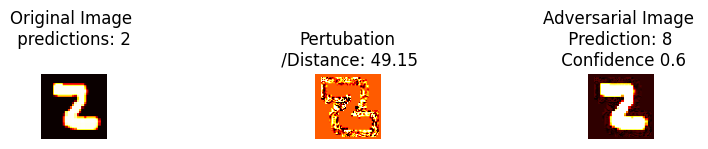

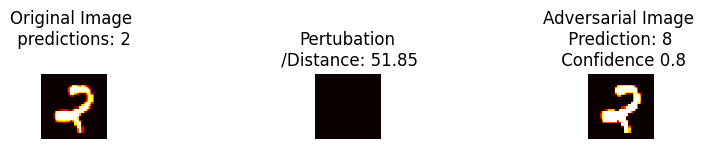

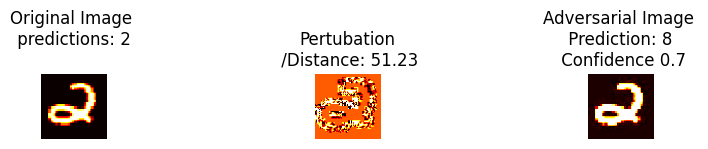

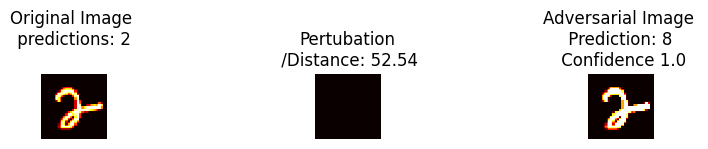

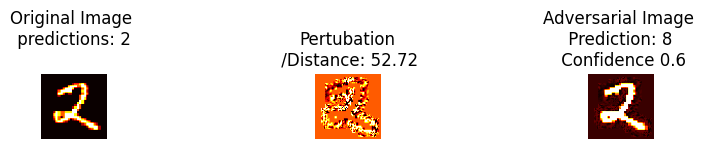

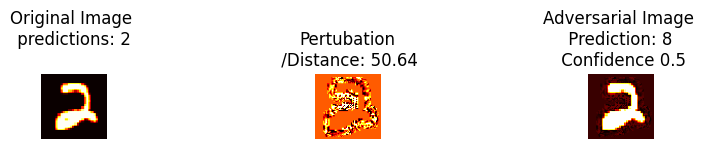

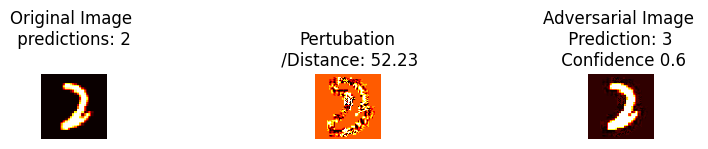

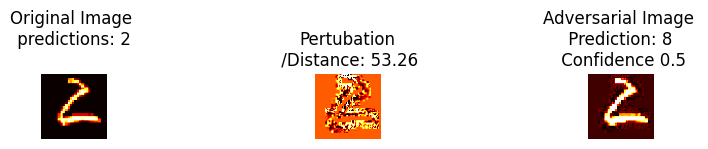

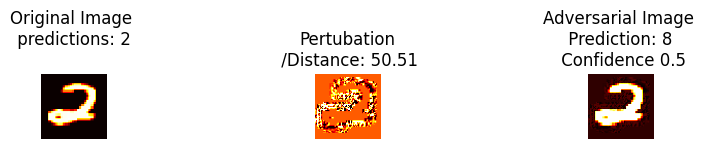

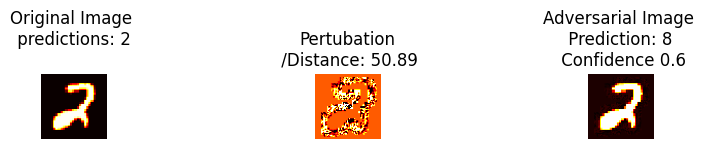

In [213]:
batch_visualization(attack_results, reshaped_sample_twos, l2_norm_distance, model_custom)

## Model Evaluation after Perturbation

In [299]:
# x_test, y_train, y_test
x_test_2000 = x_test[:2000]
y_test_2000 = y_test[:2000]
r_x_test_2000 = np.asanyarray([np.expand_dims(img, axis=0) for img in x_test_2000])
x_test_2000.shape, r_x_test_2000[0].shape, reshaped_sample_twos[0].shape
# r_x_test_2000 = np.asanyarray([np.expand_dims(img) for img in x_test_2000])

((2000, 64, 64, 3), (1, 64, 64, 3), (1, 64, 64, 3))

### perturb test set

In [324]:
THRESHHOLD = 0.25

In [332]:
def perturb_test_set(test_set, threshhold, verbose=True):
    quota = int(threshhold * len(test_set))
    print(quota)
    img_to_perturb = test_set[:quota]
    
    print(f'len(test_set): {len(test_set)}   quota: { quota}  img_to_perturb: {len(img_to_perturb)} ')
    
    perturbed_test_set = []
    
    for idx, img in enumerate(img_to_perturb):
        print(f'{idx}/{quota}')
        from scipy.optimize import differential_evolution as diff_evo
        pixel = 1
        model = model_custom
    
        cur_res = one_pixel(img, model, pixel_count=pixel, verbose=False, diff_evo=diff_evo)
        perturbed_test_set.append(cur_res[0])
    return perturb_test_set
        

In [326]:
# perturbed_test_set = []
# for img in r_x_test_2000:
#     from scipy.optimize import differential_evolution as diff_evo
#     pixel = 1
#     model = model_custom

#     cur_res = one_pixel(img, model, pixel_count=pixel, verbose=False, diff_evo=diff_evo)
#     loop_results.append(cur_res[0])

In [ ]:
perturb_test_set(r_x_test_2000, THRESHHOLD)

500
len(test_set): 2000   quota: 500  img_to_perturb: 500 
0/500
1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
50/500
51/500
52/500
53/500
54/500
55/500
56/500
57/500
58/500
59/500
60/500
61/500
62/500
63/500
64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131